## Notebook to test the Reservoir Uncertainty via Bootstrap

In [6]:
# importing Python libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from mpl_toolkits.mplot3d.axes3d import Axes3D
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
import scipy.stats as st
import seaborn as sns
import math
import random
from scipy import stats

In [2]:
# loading declustered data - both raw and outliers removed
clean_sandstone = pd.read_csv('DeclusteredSandstone.csv')
clean_shale = pd.read_csv('DeclusteredShale.csv')
raw_sandstone = pd.read_csv('DeclusteredRawSandstone.csv')
raw_shale = pd.read_csv('DeclusteredRawShale.csv')
# removing the extra data column
del clean_sandstone['Unnamed: 0']
del clean_shale['Unnamed: 0']
del raw_sandstone['Unnamed: 0']
del raw_shale['Unnamed: 0']
# concatenate dataframes to recreate totalsets
raw_df = pd.concat([raw_sandstone, raw_shale])
clean_df = pd.concat([clean_sandstone, clean_shale])

### Uncertainty Model for Porosity
Use the declustered weights to bootstrap the porosity distribution and develop an uncertainty model to assess the uncertainty in the porosity mean and standard deviation.

In [22]:
# adjust GSLIB histogram plotting functionality
def hist_st(array,xmin,xmax,log,cumul,bins,weights,xlabel,title,col):  
    cs = plt.hist(array, alpha = 0.2, color = col, edgecolor = 'black', bins=bins, range = [xmin,xmax], weights = weights, log = log, cumulative = cumul)
    plt.title(title)
    plt.xlabel(xlabel); plt.ylabel('Frequency') 
    return

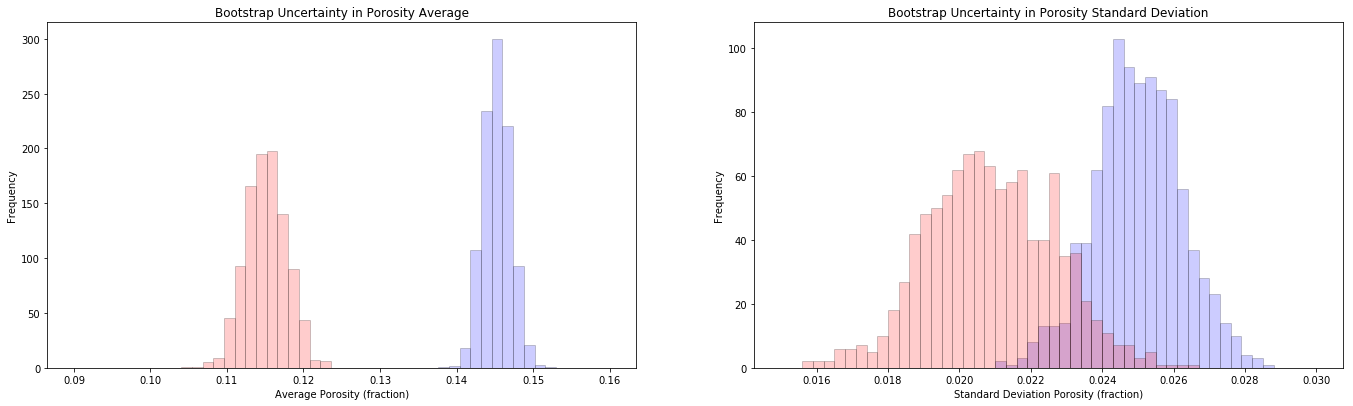

Summary Statistics for Bootstrap Sandstone Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.13891867489152798, 0.15170549966578947), mean=0.14525390913315336, variance=3.1474376219654157e-06, skewness=0.05648416459131136, kurtosis=0.07575441169253105)
P10 0.143, P50 0.145, P90 0.148

Summary Statistics for Bootstrap Shale Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.10428717686286897, 0.1233712510164713), mean=0.11512298463910844, variance=7.2124301626027145e-06, skewness=-0.021393052087023978, kurtosis=0.07501534304614665)
P10 0.112, P50 0.115, P90 0.119

Summary Statistics for Bootstrap Sandstone Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.02113274929575282, 0.02854612458264834), mean=0.02500640965183854, variance=1.478732166597373e-06, skewness=-0.03933799510271275, kurtosis=0.030249010960389455)
P10 0.023, P50 0.025, P90 0.027

Summary Statistics for Bootstrap Shale Porosity Standard Deviation Realizations:
Describ

In [74]:
# do it by facies
L = 1000                                   # set the number of realizations
mean_sand = np.zeros(L); stdev_sand = np.zeros(L)    # declare arrays to hold the realizations of the statistics
mean_shale = np.zeros(L); stdev_shale = np.zeros(L)    # declare arrays to hold the realizations of the statistics
for l in range(0, L):                      # loop over realizations
    samples_sand = random.choices(raw_sandstone['Porosity'].values, weights=raw_sandstone['Wts'].values,
                                  cum_weights=None, k=len(raw_sandstone))
    samples_shale = random.choices(raw_shale['Porosity'].values, weights=raw_shale['Wts'].values,
                                  cum_weights=None, k=len(raw_shale))
    mean_sand[l] = np.average(samples_sand)
    mean_shale[l] = np.average(samples_shale)
    stdev_sand[l] = np.std(samples_sand)
    stdev_shale[l] = np.std(samples_shale)
    
plt.subplot(121)
hist_st(mean_sand,0.09,0.16,False,False,50,None,
       'Average Porosity (fraction)','Bootstrap Uncertainty in Porosity Average','blue')
hist_st(mean_shale,0.09,0.16,False,False,50,None,
       'Average Porosity (fraction)','Bootstrap Uncertainty in Porosity Average','red')

plt.subplot(122)
hist_st(stdev_sand,0.015,0.03,False,False,50,None,
        'Standard Deviation Porosity (fraction)','Bootstrap Uncertainty in Porosity Standard Deviation','blue')
hist_st(stdev_shale,0.015,0.03,False,False,50,None,
        'Standard Deviation Porosity (fraction)','Bootstrap Uncertainty in Porosity Standard Deviation','red')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Sandstone Porosity Mean Realizations:')
print(stats.describe(mean_sand))
print('P10 ' + str(round(np.percentile(mean_sand,10),3)) 
      + ', P50 ' + str(round(np.percentile(mean_sand,50),3)) 
      + ', P90 ' + str(round(np.percentile(mean_sand,90),3))) 

print('')

print('Summary Statistics for Bootstrap Shale Porosity Mean Realizations:')
print(stats.describe(mean_shale))
print('P10 ' + str(round(np.percentile(mean_shale,10),3)) 
      + ', P50 ' + str(round(np.percentile(mean_shale,50),3)) 
      + ', P90 ' + str(round(np.percentile(mean_shale,90),3))) 

print('')

print('Summary Statistics for Bootstrap Sandstone Porosity Standard Deviation Realizations:')
print(stats.describe(stdev_sand))
print('P10 ' + str(round(np.percentile(stdev_sand,10),3)) 
      + ', P50 ' + str(round(np.percentile(stdev_sand,50),3)) 
      + ', P90 ' + str(round(np.percentile(stdev_sand,90),3))) 

print('')

print('Summary Statistics for Bootstrap Shale Porosity Standard Deviation Realizations:')
print(stats.describe(stdev_shale))
print('P10 ' + str(round(np.percentile(stdev_shale,10),3)) 
      + ', P50 ' + str(round(np.percentile(stdev_shale,50),3)) 
      + ', P90 ' + str(round(np.percentile(stdev_shale,90),3))) 

### Uncertainty Model for Permeability
Use the declustered weights to bootstrap the permeability distribution and develop an uncertainty model to assess the uncertainty in the permeability mean and standard deviation.

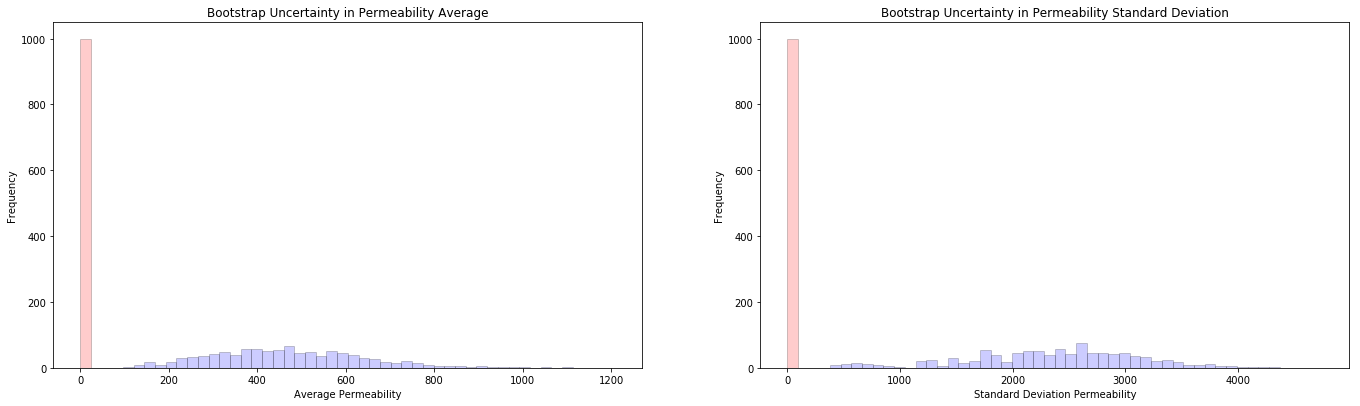

Summary Statistics for Bootstrap Sandstone Permeability Mean Realizations:
DescribeResult(nobs=1000, minmax=(102.72835977794539, 1103.278869801331), mean=470.3708976567165, variance=29178.02645584741, skewness=0.45022546098488114, kurtosis=0.10668675729980093)
P10 257.973, P50 461.435, P90 698.085

Summary Statistics for Bootstrap Shale Permeability Mean Realizations:
DescribeResult(nobs=1000, minmax=(1.2296101765670029, 23.97246414347896), mean=7.062804130244841, variance=9.374400520749365, skewness=0.7229724942184184, kurtosis=0.9509677962704597)
P10 3.386, P50 6.657, P90 11.158

Summary Statistics for Bootstrap Sandstone Permeability Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(382.2201514913166, 4293.636592687556), mean=2346.759300560958, variance=562678.4198545318, skewness=-0.37278691670863034, kurtosis=-0.08290420106937679)
P10 1303.812, P50 2426.293, P90 3270.442

Summary Statistics for Bootstrap Shale Permeability Standard Deviation Realizations:
Describe

In [77]:
# do it by facies
L = 1000                                   # set the number of realizations
mean_sand = np.zeros(L); stdev_sand = np.zeros(L)    # declare arrays to hold the realizations of the statistics
mean_shale = np.zeros(L); stdev_shale = np.zeros(L)    # declare arrays to hold the realizations of the statistics
for l in range(0, L):                      # loop over realizations
    samples_sand = random.choices(raw_sandstone['Perm'].values, weights=raw_sandstone['Wts'].values,
                                  cum_weights=None, k=len(raw_sandstone))
    samples_shale = random.choices(raw_shale['Perm'].values, weights=raw_shale['Wts'].values,
                                  cum_weights=None, k=len(raw_shale))
    mean_sand[l] = np.average(samples_sand)
    mean_shale[l] = np.average(samples_shale)
    stdev_sand[l] = np.std(samples_sand)
    stdev_shale[l] = np.std(samples_shale)
    
plt.subplot(121)
hist_st(mean_sand,0.0,1210,False,False,50,None,
       'Average Permeability','Bootstrap Uncertainty in Permeability Average','blue')
hist_st(mean_shale,0.0,1210,False,False,50,None,
       'Average Permeability','Bootstrap Uncertainty in Permeability Average','red')

plt.subplot(122)
hist_st(stdev_sand,0.0,4750,False,False,50,None,
        'Standard Deviation Permeability','Bootstrap Uncertainty in Permeability Standard Deviation','blue')
hist_st(stdev_shale,0.0,4750,False,False,50,None,
        'Standard Deviation Permeability','Bootstrap Uncertainty in Permeability Standard Deviation','red')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Sandstone Permeability Mean Realizations:')
print(stats.describe(mean_sand))
print('P10 ' + str(round(np.percentile(mean_sand,10),3)) 
      + ', P50 ' + str(round(np.percentile(mean_sand,50),3)) 
      + ', P90 ' + str(round(np.percentile(mean_sand,90),3))) 

print('')

print('Summary Statistics for Bootstrap Shale Permeability Mean Realizations:')
print(stats.describe(mean_shale))
print('P10 ' + str(round(np.percentile(mean_shale,10),3)) 
      + ', P50 ' + str(round(np.percentile(mean_shale,50),3)) 
      + ', P90 ' + str(round(np.percentile(mean_shale,90),3))) 

print('')

print('Summary Statistics for Bootstrap Sandstone Permeability Standard Deviation Realizations:')
print(stats.describe(stdev_sand))
print('P10 ' + str(round(np.percentile(stdev_sand,10),3)) 
      + ', P50 ' + str(round(np.percentile(stdev_sand,50),3)) 
      + ', P90 ' + str(round(np.percentile(stdev_sand,90),3))) 

print('')

print('Summary Statistics for Bootstrap Shale Permeability Standard Deviation Realizations:')
print(stats.describe(stdev_shale))
print('P10 ' + str(round(np.percentile(stdev_shale,10),3)) 
      + ', P50 ' + str(round(np.percentile(stdev_shale,50),3)) 
      + ', P90 ' + str(round(np.percentile(stdev_shale,90),3))) 

### Uncertainty Model for Facies Proportions
Apply the bootstrap method to model facies proportions in the reservoir accounting for the spatial bias by taking cell decluster weights into account.

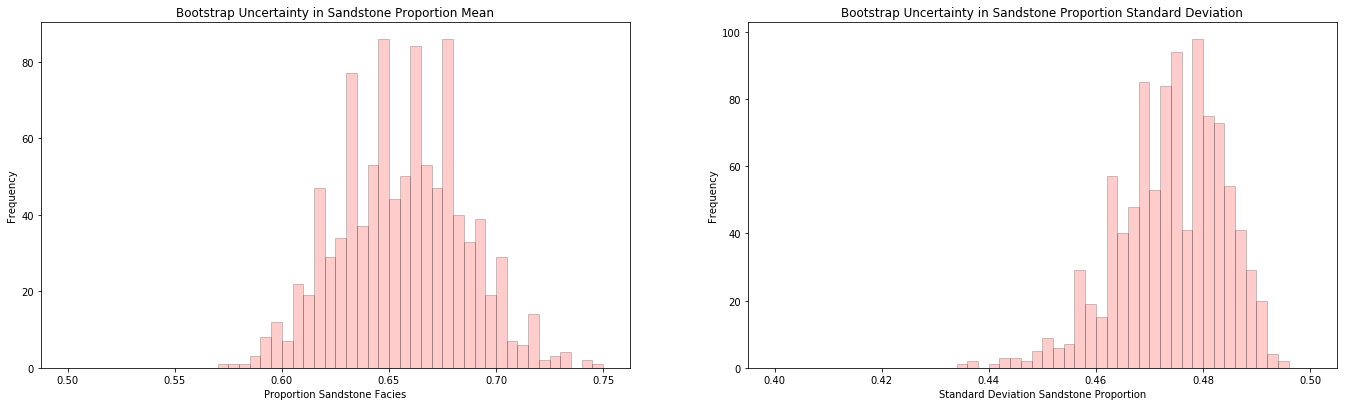

Summary Statistics for Bootstrap Facies Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.5719557195571956, 0.7453874538745388), mean=0.656180811808118, variance=0.0008375960143365271, skewness=0.05303095598038871, kurtosis=-0.21916413003553759)
P10 0.62, P50 0.657, P90 0.694

Summary Statistics for Bootstrap Facies Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.43564319974145255, 0.49479528536861206), mean=0.4740005495590158, variance=9.43689913773391e-05, skewness=-0.6080625565409519, kurtosis=0.39008835354450655)
P10 0.461, P50 0.475, P90 0.485


In [79]:
# assign DataFrame to raw or clean data (entire set)
df = raw_df
L = 1000                                   # set the number of realizations
mean = np.zeros(L); stdev = np.zeros(L)    # declare arrays to hold the realizations of the statistics
for l in range(0, L):                      # loop over realizations
    samples = random.choices(df['Facies'].values, weights=df['Wts'].values, cum_weights=None, k=len(df))
    mean[l] = np.average(samples)
    stdev[l] = np.std(samples)
    
plt.subplot(121)
GSLIB.hist_st(mean,0.5,0.75,False,False,50,None,
              'Proportion Sandstone Facies','Bootstrap Uncertainty in Sandstone Proportion Mean')

plt.subplot(122)
GSLIB.hist_st(stdev,0.4,0.5,False,False,50,None,
              'Standard Deviation Sandstone Proportion',
              'Bootstrap Uncertainty in Sandstone Proportion Standard Deviation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Facies Mean Realizations:')
print(stats.describe(mean))
print('P10 ' + str(round(np.percentile(mean,10),3)) + ', P50 ' + str(round(np.percentile(mean,50),3)) + ', P90 ' + str(round(np.percentile(mean,90),3))) 

print('\nSummary Statistics for Bootstrap Facies Standard Deviation Realizations:')
print(stats.describe(stdev))
print('P10 ' + str(round(np.percentile(stdev,10),3)) + ', P50 ' + str(round(np.percentile(stdev,50),3)) + ', P90 ' + str(round(np.percentile(stdev,90),3))) 


### Uncertainty Model for Oil in Place
The oil saturation in the reservoir is assumed to be 0.9 and the thickness of the field is 20m. The dimensions of the area of interest are 1km x 1km which means the total volume is 1 x 1 x 0.2 = 0.2 cubic kilometers = 20,000,000 cubic meters. The porosity value will be sampled from the declustered porosity data.

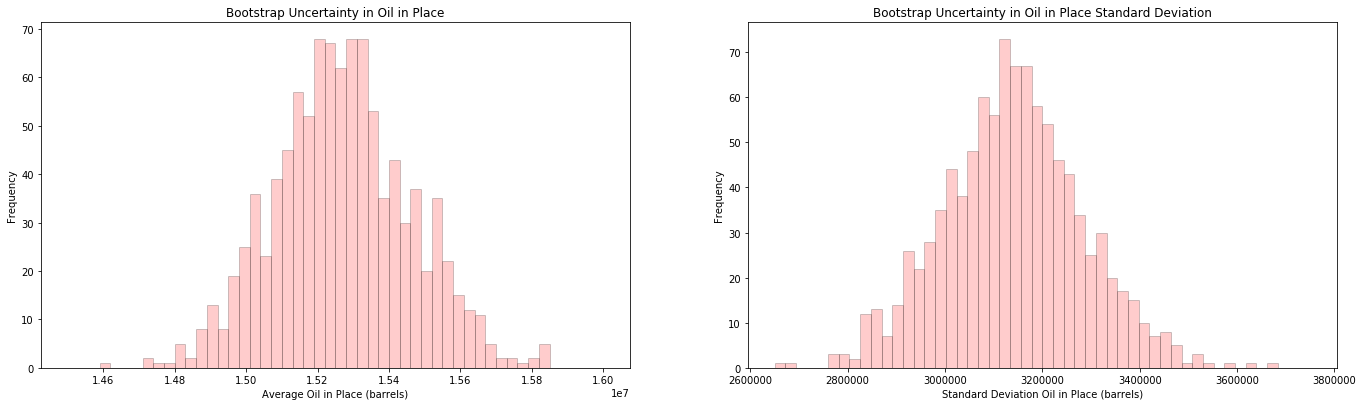

Summary Statistics for Bootstrap Oil in Place Mean Realizations:
DescribeResult(nobs=1000, minmax=(14611653.693366893, 15848270.656589495), mean=15268754.997924568, variance=36515324516.62336, skewness=0.10918108883324004, kurtosis=0.02244896574092392)
P10 15019564.531, P50 15262008.219, P90 15530660.774

Summary Statistics for Bootstrap Oil in Place Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(2659500.846185088, 3682597.3812712524), mean=3139566.811665727, variance=20556100742.865807, skewness=0.0811430672998665, kurtosis=0.20115161812055993)
P10 2952000.767, P50 3137915.013, P90 3325458.047


In [87]:
# basically bootstrapping the overall porosity distribution weighted by declustered weights
L = 1000                                   # set the number of realizations
mean = np.zeros(L); stdev = np.zeros(L)    # declare arrays to hold the realizations of the statistics
for l in range(0, L):                      # loop over realizations
    samples = random.choices(df['Porosity'].values, weights=df['Wts'].values, cum_weights=None, k=len(df)+10)
    for i in range(0,len(df)+10):
        samples[i] = samples[i]*20000000*0.9*6.29
    mean[l] = np.average(samples)
    stdev[l] = np.std(samples)
    
plt.subplot(121)
GSLIB.hist_st(mean,14500000,16000000,False,False,50,None,
              'Average Oil in Place (barrels)',
              'Bootstrap Uncertainty in Oil in Place')

plt.subplot(122)
GSLIB.hist_st(stdev,2650000,3750000,False,False,50,None,
              'Standard Deviation Oil in Place (barrels)',
              'Bootstrap Uncertainty in Oil in Place Standard Deviation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Oil in Place Mean Realizations:')
print(stats.describe(mean))
print('P10 ' + str(round(np.percentile(mean,10),3)) + ', P50 ' + str(round(np.percentile(mean,50),3)) + ', P90 ' + str(round(np.percentile(mean,90),3))) 

print('\nSummary Statistics for Bootstrap Oil in Place Standard Deviation Realizations:')
print(stats.describe(stdev))
print('P10 ' + str(round(np.percentile(stdev,10),3)) + ', P50 ' + str(round(np.percentile(stdev,50),3)) + ', P90 ' + str(round(np.percentile(stdev,90),3))) 
